In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from scipy.signal import detrend

def get_FAMIs(x0,y0):
    """ 

    Parameters
    ----------
    x0: static variables of interest 
    
    Returns
    -------
    FAMIs: the residual of the multiple linear regression 
    coef: coefficients of the variables of interest from regression line
    """
    x = np.log(x0)

    y = np.log(y0)
    V = x.shape[1]

    X = sm.add_constant(x)
    # print(X.shape,y.shape)
    model = sm.OLS(y, X).fit(cov_type='HC1')
    coef = model.params[1:].tolist()
    CI_low = model.conf_int(alpha=0.05, cols=None)[1:][0].tolist()
    CI_high = model.conf_int(alpha=0.05, cols=None)[1:][1].tolist()

    y_pred = model.params[0]  + np.sum([model.params[v+1]*np.log(x0)[:,v] for v in range(V)], axis=0)
    FAMIs = y-y_pred

    return FAMIs, coef, CI_low, CI_high



def adf_detrend(data):
    # ADF Test on each column
    N, T = data.shape
    ts = np.zeros((N,T),dtype=float)
    for n in range(N):
        result = adfuller(data[n])
        if result[1]>0.05:
            ts_detrended = detrend(data[n])
        # result_detrended = adfuller(ts_detrended)
        
        else: ts_detrended = data[n]
        ts[n] = ts_detrended.reshape(1,T)
    return ts

def symbolize(values, percentiles):
        # Flatten the array to create a 1D array for binning
        flat_values = values.flatten()
        binned_indices = np.digitize(flat_values, percentiles, right=True)
        symbolized_array = binned_indices.reshape(values.shape)
        # print(np.unique(symbolized_array))
        return symbolized_array


In [3]:
weeklynew_covid_data = pd.read_csv('./Data/weeklyincre_covid.csv')
weeklynew_covid_data

,Unnamed: 0,cbsacode,cbsatitle,Date,COVID_WEEKLYINCRE,DEATH_WEEKLYINCRE,DOSE1_WEEKLYINCRE,SERIES_WEEKLYINCRE,Population_2020,all_icu,...,Uninsured,College,DEMOCRAT,REPUBLICAN,Drive alone,Traffic volume,Households with Severe Cost Burden,PerCapita_COVID,PerCapita_DEATH,PerCapita_VACCINE
0,0,10100.0,"Aberdeen, SD",2021-01-27,98.0,5.0,3003.0,1095.0,42287,10,...,3764.0,7203,6955,12118,22383.0,90.880875,1807.0,0.002317,0.000118,0.025894
1,1,10100.0,"Aberdeen, SD",2021-02-03,92.0,4.0,431.0,305.0,42287,10,...,3764.0,7203,6955,12118,22383.0,90.880875,1807.0,0.002176,0.000095,0.007213
2,2,10100.0,"Aberdeen, SD",2021-02-10,69.0,1.0,322.0,519.0,42287,10,...,3764.0,7203,6955,12118,22383.0,90.880875,1807.0,0.001632,0.000024,0.012273
3,3,10100.0,"Aberdeen, SD",2021-02-17,52.0,5.0,1469.0,528.0,42287,10,...,3764.0,7203,6955,12118,22383.0,90.880875,1807.0,0.001230,0.000118,0.012486
4,4,10100.0,"Aberdeen, SD",2021-02-24,41.0,2.0,905.0,464.0,42287,10,...,3764.0,7203,6955,12118,22383.0,90.880875,1807.0,0.000970,0.000047,0.010973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69211,69211,49820.0,"Zapata, TX",2022-10-26,22.0,1.0,1.0,1.0,13889,1,...,3596.0,1315,1826,2033,4838.0,67.176785,459.0,0.001584,0.000072,0.000072
69212,69212,49820.0,"Zapata, TX",2022-11-02,2.0,1.0,1.0,1.0,13889,1,...,3596.0,1315,1826,2033,4838.0,67.176785,459.0,0.000144,0.000072,0.000072
69213,69213,49820.0,"Zapata, TX",2022-11-09,11.0,1.0,26.0,28.0,13889,1,...,3596.0,1315,1826,2033,4838.0,67.176785,459.0,0.000792,0.000072,0.002016
69214,69214,49820.0,"Zapata, TX",2022-11-16,7.0,1.0,4.0,4.0,13889,1,...,3596.0,1315,1826,2033,4838.0,67.176785,459.0,0.000504,0.000072,0.000288


# Scaling exponents $\beta_{N,t}$ and $\beta_{R,t}$ in multivariate urban scaling

['Population_2020', 'all_icu', 'DEMOCRAT', '60plus']


/var/folders/5r/5gd5nnz10gb73gwmbv5yxjdc0000gp/T/ipykernel_2150/532524021.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FAMIs_covid_weekly'] = FAMIs_covid_weekly[:,t]
/var/folders/5r/5gd5nnz10gb73gwmbv5yxjdc0000gp/T/ipykernel_2150/532524021.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FAMIs_death_weekly'] = FAMIs_death_weekly[:,t]
/var/folders/5r/5gd5nnz10gb73gwmbv5yxjdc0000gp/T/ipykernel_2150/532524021.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

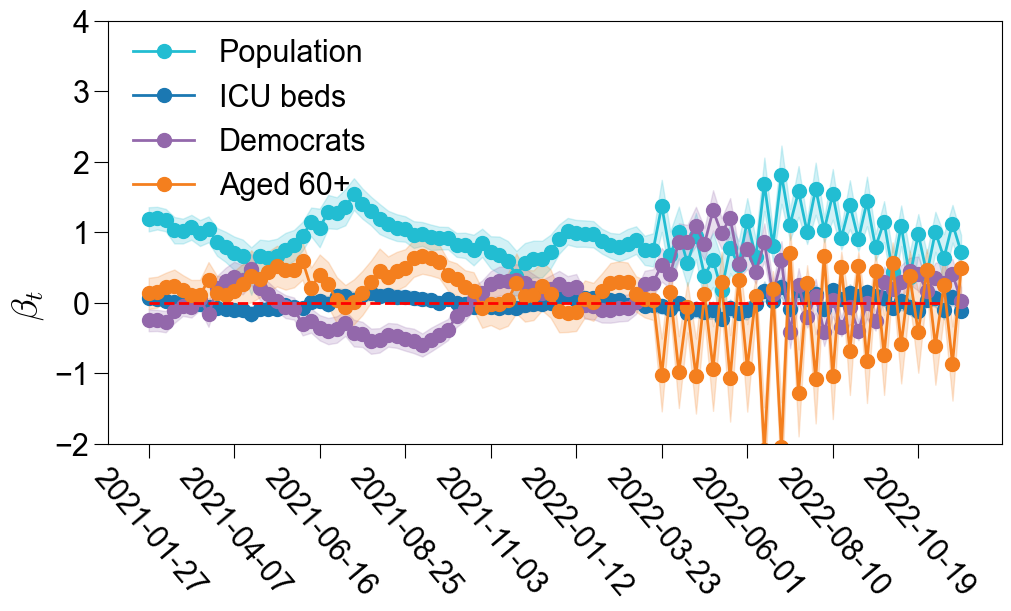

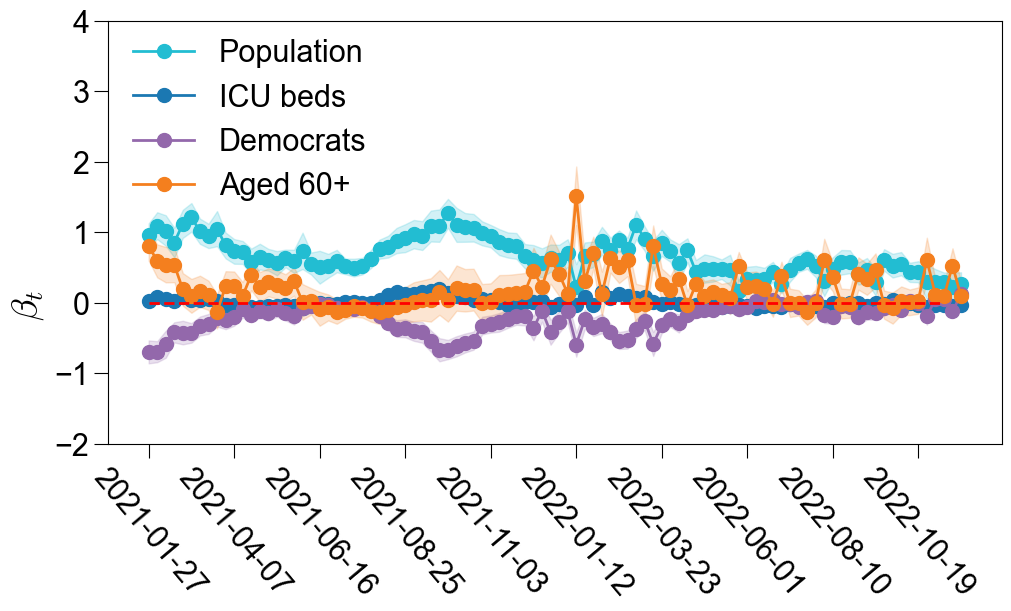

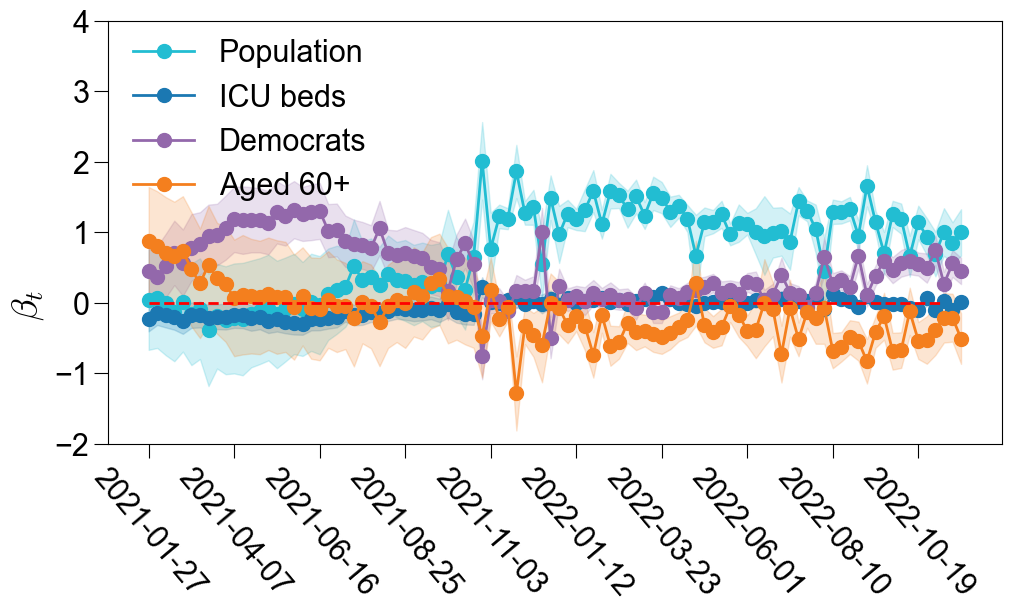

In [21]:
index = [
        'Population_2020',
         'all_icu',
         'DEMOCRAT',
        '60plus',
        # 'College',
        #  'REPUBLICAN'
         ]
# index = ['cbsacode', 'date_updated','cbsa_population','new_death_count','new_fullvaccine_count','covid_hospital_admissions_count','all_icu','60plus','Smoking','Uninsured','DEMOCRAT','REPUBLICAN']
print(index)

M = len(weeklynew_covid_data.cbsacode.unique()) # number of MSA areas
dataset = weeklynew_covid_data[['cbsacode', 'cbsatitle','Date','Population_2020',
                        'COVID_WEEKLYINCRE','DEATH_WEEKLYINCRE','DOSE1_WEEKLYINCRE','SERIES_WEEKLYINCRE',
                        'PerCapita_COVID', 'PerCapita_DEATH', 'PerCapita_VACCINE',
                        'all_icu','60plus','College',
                        'Smoking','Uninsured','DEMOCRAT','REPUBLICAN']]

# df = dataset[dataset['date_updated_weekly']<df_covid_msa_weekly.date_updated.unique()[-40]]
df = dataset
static_variables=np.ones((M, len(index)),dtype=float)
for i in range(len(index)):
    static_variables[:,i] = df[df['Date']==dataset.Date.unique()[5]][index[i]].tolist()
# dates = dataset.Date.unique()
dates = dataset.Date.unique()
T = len(dates)

# # # # T = 130-2
FAMIs_covid_weekly = np.ones((M,T), dtype=float)
FAMIs_covid_weekly_static = np.ones((len(index),T), dtype=float)
FAMIs_covid_weekly_CI_low = np.ones((len(index),T), dtype=float)
FAMIs_covid_weekly_CI_high = np.ones((len(index),T), dtype=float)

FAMIs_death_weekly = np.ones((M,T), dtype=float)
FAMIs_death_weekly_static = np.ones((len(index),T), dtype=float)
FAMIs_death_weekly_CI_low = np.ones((len(index),T), dtype=float)
FAMIs_death_weekly_CI_high = np.ones((len(index),T), dtype=float)
# FAMIs_test_weekly = np.ones((M,T), dtype=float)
# FAMIs_test_weekly_static = np.ones((len(index),T), dtype=float)

FAMIs_vaccine_weekly = np.ones((M,T), dtype=float)
FAMIs_vaccine_weekly_static = np.ones((len(index),T), dtype=float)
FAMIs_vaccine_weekly_CI_low = np.ones((len(index),T), dtype=float)
FAMIs_vaccine_weekly_CI_high = np.ones((len(index),T), dtype=float)


FAMIs_fullvaccine_weekly = np.ones((M,T), dtype=float)
FAMIs_fullvaccine_weekly_static = np.ones((len(index),T), dtype=float)
FAMIs_fullvaccine_weekly_CI_low = np.ones((len(index),T), dtype=float)
FAMIs_fullvaccine_weekly_CI_high = np.ones((len(index),T), dtype=float)

PerCapita_covid_weekly = np.ones((M,T), dtype=float)
PerCapita_death_weekly = np.ones((M,T), dtype=float)
PerCapita_vaccine_weekly = np.ones((M,T), dtype=float)

df_famis = pd.DataFrame({'cbsacode':[], 'cbsatitle':[],'Date':[], 'Total Population':[], 
       'COVID_WEEKLYINCRE':[],'DEATH_WEEKLYINCRE':[],'DOSE1_WEEKLYINCRE':[],'SERIES_WEEKLYINCRE':[],
                        
       'all_icu':[],'60plus':[], 'Smoking':[], 'Uninsured':[], 'College': [], 'DEMOCRAT':[], 'REPUBLICAN':[],
       'FAMIs_covid_weekly':[],
       'FAMIs_death_weekly':[], 
       'FAMIs_fullvaccine_weekly':[],
       
       })
for t in range(T):
    date = dates[t]
    df = dataset[dataset['Date'] == date]
    # # df[index]
    FAMIs_covid_weekly[:,t], FAMIs_covid_weekly_static[:,t],FAMIs_covid_weekly_CI_low[:,t],FAMIs_covid_weekly_CI_high[:,t]  = get_FAMIs(static_variables,df['COVID_WEEKLYINCRE'])
    FAMIs_death_weekly[:,t], FAMIs_death_weekly_static[:,t],FAMIs_death_weekly_CI_low[:,t],FAMIs_death_weekly_CI_high[:,t]  = get_FAMIs(static_variables,df['DEATH_WEEKLYINCRE'])
    FAMIs_fullvaccine_weekly[:,t], FAMIs_fullvaccine_weekly_static[:,t],FAMIs_fullvaccine_weekly_CI_low[:,t],FAMIs_fullvaccine_weekly_CI_high[:,t]  = get_FAMIs(static_variables,df['SERIES_WEEKLYINCRE'])
    df['FAMIs_covid_weekly'] = FAMIs_covid_weekly[:,t]
    df['FAMIs_death_weekly'] = FAMIs_death_weekly[:,t]
    # df['FAMIs_test_weekly'] = FAMIs_test_weekly[:,t]
    df['FAMIs_vaccine_weekly'] = FAMIs_vaccine_weekly[:,t]
    df['FAMIs_fullvaccine_weekly'] = FAMIs_fullvaccine_weekly[:,t]
    # df['FAMIs_booster_weekly'] = FAMIs_booster_weekly[:,t]
    # df['FAMIs_hospital_weekly'] = FAMIs_hospital_weekly[:,t]
    df_famis = df_famis.append(df)

    PerCapita_covid_weekly[:, t] = df['PerCapita_COVID']
    PerCapita_death_weekly[:, t] = df['PerCapita_DEATH']
    PerCapita_vaccine_weekly[:, t] = df['PerCapita_VACCINE']

colors = ['#22BDD2', '#1B78B2', '#9368AB','#F47F1E','#8fc0a9','#bf4342',]
shadows = ['#22BDD2', '#1B78B2', '#9368AB','#F47F1E','#8fc0a9','#bf4342',]
indices = [
            'Population',
           'ICU beds',
           'Democrats',
           'Aged 60+',
            # 'College education',
        #    'Republicans'
           ]

plt.rcParams.update({
    'font.size' : 22,
    "lines.linewidth": 2,
    "lines.markersize": 10,
    "font.family":"arial",
    #"font.serif": ["Computer Modern Roman"],
    "mathtext.fontset": "cm",
    "mathtext.default": "it",
    "mathtext.rm"  : "arial",
        })
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6), sharex=True, constrained_layout=True)
axes.tick_params(axis="x",direction="out", size=10)
axes.tick_params(axis="y",direction="out", size=10)


for i in range(len(index)):
    axes.fill_between(range(T), FAMIs_covid_weekly_CI_low[i,:], FAMIs_covid_weekly_CI_high[i,:], color=shadows[i],alpha=.2)
    axes.plot(range(T),FAMIs_covid_weekly_static[i,:],'o-',label=indices[i], color=colors[i],)
axes.hlines(y=0,xmin=0,xmax=T-3,linestyles='--',colors='r')
axes.set_xticks(range(0,T,10),[dates[t] for t in range(0,T,10)],rotation=-50,size=22)
axes.set_ylim([-2, 4])
# axes.set_title('Covid cases')
fig.supylabel(r'$\beta_t$')
fig.legend( loc = 'upper left', bbox_to_anchor = (0.1, -0.01, 1, 1), frameon=False)
# plt.savefig('ScalingExponent_FAMI_covid.pdf',dpi=300)
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(10, 6),  sharex=True, constrained_layout=True)
axes.tick_params(axis="x",direction="out", size=10)
axes.tick_params(axis="y",direction="out", size=10)
for i in range(len(index)):
    axes.fill_between(range(T), FAMIs_death_weekly_CI_low[i,:], FAMIs_death_weekly_CI_high[i,:],color=shadows[i],alpha=.2)
    axes.plot(range(T),FAMIs_death_weekly_static[i,:],'o-',label=indices[i],color=colors[i])
axes.hlines(y=0,xmin=0,xmax=T-3,linestyles='--',colors='r')
axes.set_xticks(range(0,T,10),[dates[t] for t in range(0,T,10)],rotation=-50, size=22)
axes.set_ylim([-2, 4])

fig.supylabel(r'$\beta_t$')
fig.legend( loc = 'upper left', bbox_to_anchor = (0.1, -0.01, 1, 1), frameon=False)
# plt.savefig('ScalingExponent_FAMI_death.pdf',dpi=300)
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(10, 6),  sharex=True, constrained_layout=True)
axes.tick_params(axis="x",direction="out", size=10)
axes.tick_params(axis="y",direction="out", size=10)
for i in range(len(index)):
    axes.fill_between(range(T), FAMIs_fullvaccine_weekly_CI_low[i,:], FAMIs_fullvaccine_weekly_CI_high[i,:],color=shadows[i],alpha=.2)
    axes.plot(range(T),FAMIs_fullvaccine_weekly_static[i,:],'o-',label=indices[i],color=colors[i])
axes.hlines(y=0,xmin=0,xmax=T-3,linestyles='--',colors='r')
axes.set_xticks(range(0,T,10),[dates[t] for t in range(0,T,10)],rotation=-50,size=22)
axes.set_ylim([-2, 4])
fig.supylabel(r'$\beta_t$')
fig.legend( loc = 'upper left', bbox_to_anchor = (0.1, -0.01, 1, 1), frameon=False)
# plt.savefig('ScalingExponent_FAMI_vaccine.pdf',dpi=300)
plt.show()


# Multivariate urban scaling vs. univariate urban scaling

['Population_2020']


/var/folders/5r/5gd5nnz10gb73gwmbv5yxjdc0000gp/T/ipykernel_2150/4202352650.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SAMIs_covid_weekly'] = SAMIs_covid_weekly[:,t]
/var/folders/5r/5gd5nnz10gb73gwmbv5yxjdc0000gp/T/ipykernel_2150/4202352650.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SAMIs_death_weekly'] = SAMIs_death_weekly[:,t]
/var/folders/5r/5gd5nnz10gb73gwmbv5yxjdc0000gp/T/ipykernel_2150/4202352650.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

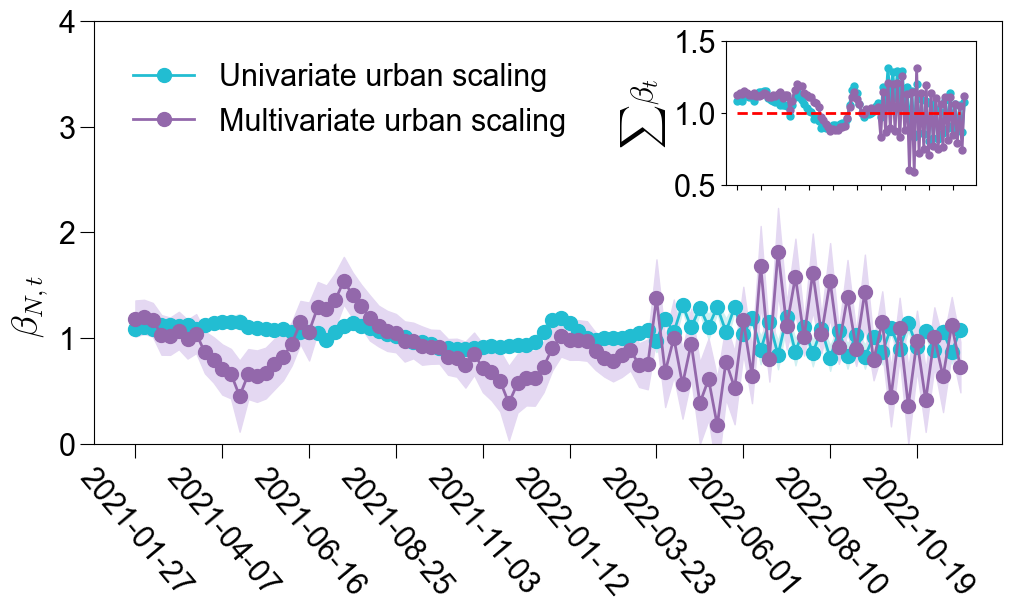

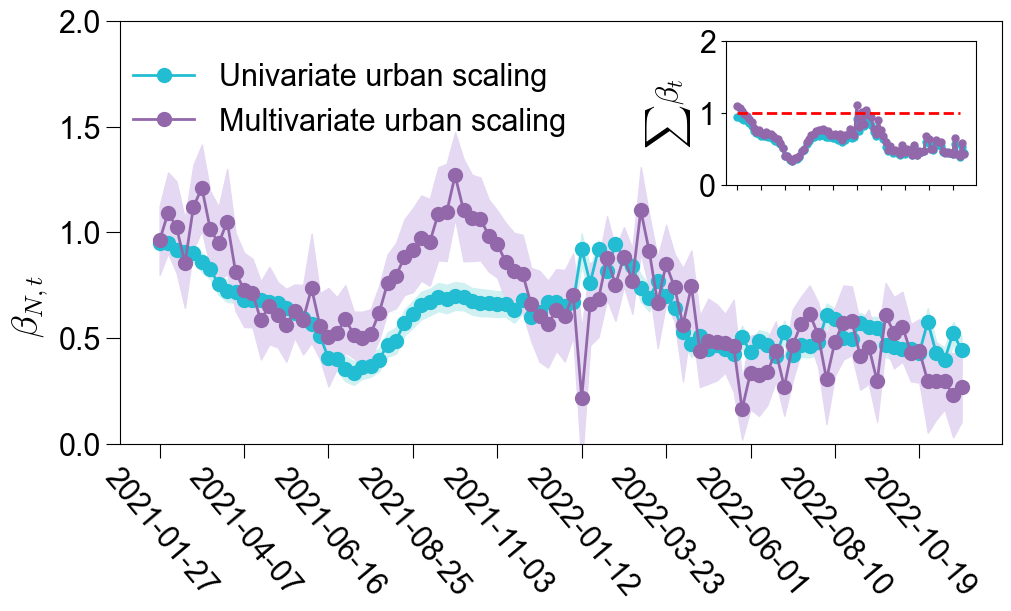

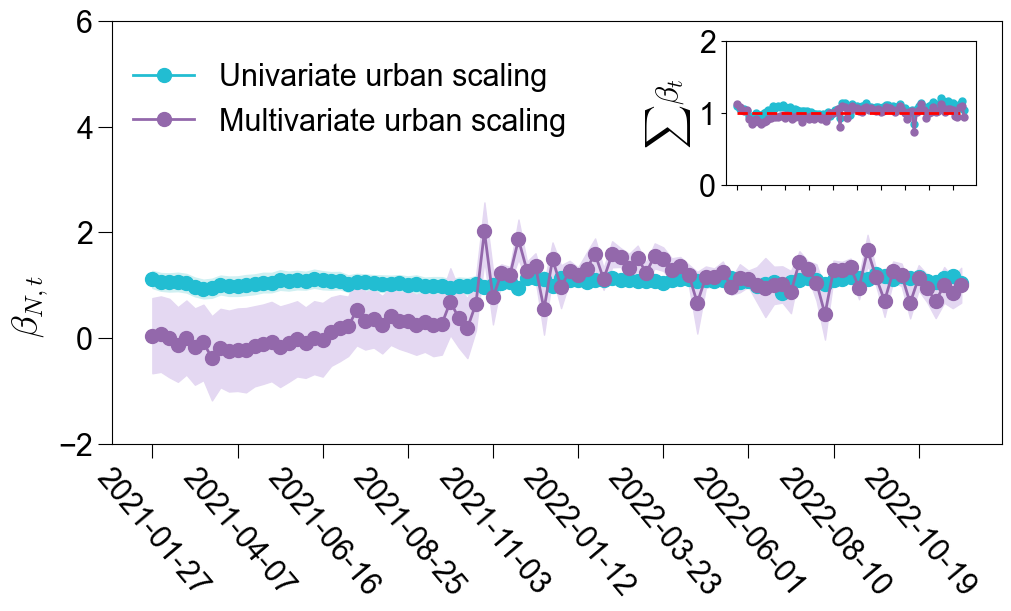

In [5]:
index = ['Population_2020',] 
print(index)
M = len(weeklynew_covid_data.cbsacode.unique()) # number of MSA areas
dataset = weeklynew_covid_data[['cbsacode', 'cbsatitle','Date','Population_2020',
                        'COVID_WEEKLYINCRE','DEATH_WEEKLYINCRE','DOSE1_WEEKLYINCRE','SERIES_WEEKLYINCRE',
                        'all_icu','60plus',
                        'Smoking','Uninsured','DEMOCRAT','REPUBLICAN']]
df = dataset
static_variables=np.ones((M, len(index)),dtype=float)
for i in range(len(index)):
    
    static_variables[:,i] = df[df['Date']==weeklynew_covid_data.Date.unique()[5]][index[i]]
# dates = dataset.date_updated_weekly.unique()[10:-10]
T = len(dates)

SAMIs_covid_weekly = np.ones((M,T), dtype=float)
SAMIs_covid_weekly_static = np.ones((len(index),T), dtype=float)
SAMIs_covid_weekly_CI_low = np.ones((len(index),T), dtype=float)
SAMIs_covid_weekly_CI_high = np.ones((len(index),T), dtype=float)

SAMIs_death_weekly = np.ones((M,T), dtype=float)
SAMIs_death_weekly_static = np.ones((len(index),T), dtype=float)
SAMIs_death_weekly_CI_low = np.ones((len(index),T), dtype=float)
SAMIs_death_weekly_CI_high = np.ones((len(index),T), dtype=float)

SAMIs_fullvaccine_weekly = np.ones((M,T), dtype=float)
SAMIs_fullvaccine_weekly_static = np.ones((len(index),T), dtype=float)
SAMIs_fullvaccine_weekly_CI_low = np.ones((len(index),T), dtype=float)
SAMIs_fullvaccine_weekly_CI_high = np.ones((len(index),T), dtype=float)

df_samis = pd.DataFrame({'cbsacode':[], 'cbsatitle':[],'Date':[], 'Population_2020':[], 
        'COVID_WEEKLYINCRE':[],'DEATH_WEEKLYINCRE':[],'DOSE1_WEEKLYINCRE':[],'SERIES_WEEKLYINCRE':[],
       'all_icu':[],'60plus':[], 'Smoking':[], 'Uninsured':[], 'College': [], 'DEMOCRAT':[], 'REPUBLICAN':[],
       'SAMIs_covid_weekly':[],
       'SAMIs_death_weekly':[], 
       'SAMIs_fullvaccine_weekly':[],
       })
for t in range(T):
    date = dates[t]
    df = dataset[dataset['Date'] == date]
    SAMIs_covid_weekly[:,t], SAMIs_covid_weekly_static[:,t], SAMIs_covid_weekly_CI_low[:,t], SAMIs_covid_weekly_CI_high[:,t] = get_FAMIs(static_variables,df['COVID_WEEKLYINCRE'])
    SAMIs_death_weekly[:,t], SAMIs_death_weekly_static[:,t], SAMIs_death_weekly_CI_low[:,t], SAMIs_death_weekly_CI_high[:,t] = get_FAMIs(static_variables,df['DEATH_WEEKLYINCRE'])
    SAMIs_fullvaccine_weekly[:,t], SAMIs_fullvaccine_weekly_static[:,t], SAMIs_fullvaccine_weekly_CI_low[:,t], SAMIs_fullvaccine_weekly_CI_high[:,t] = get_FAMIs(static_variables,df['SERIES_WEEKLYINCRE'])
    df['SAMIs_covid_weekly'] = SAMIs_covid_weekly[:,t]
    df['SAMIs_death_weekly'] = SAMIs_death_weekly[:,t]
    df['SAMIs_fullvaccine_weekly'] = SAMIs_fullvaccine_weekly[:,t]
    df_samis = df_samis.append(df)

colors = ['#22BDD2',  '#9368AB',]
shadows = ['#D0F0F2', '#E4D8F2',]
indices = ['Univariate urban scaling','Multivariate urban scaling']

plt.rcParams.update({
    'font.size' : 22,
    "lines.linewidth": 2,
    'lines.markersize':10,
    "font.family":"arial",
    #"font.serif": ["Computer Modern Roman"],
    "mathtext.fontset": "cm",
    "mathtext.default": "it",
    "mathtext.rm"  : "arial",
        })
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6), sharex=True, constrained_layout=True)
axes.tick_params(axis="x",direction="out", size=10)
axes.tick_params(axis="y",direction="out", size=10)

for i in range(len(index)):
    # print(df_mix_msa.columns[-7:][i])
    # print(indices[i])
    axes.plot(range(T),SAMIs_covid_weekly_static[i,:],'o-',label=indices[i], color=colors[i],)
    axes.fill_between(range(T), SAMIs_covid_weekly_CI_low[i,:], SAMIs_covid_weekly_CI_high[i,:], color=shadows[i])
    axes.plot(range(T),FAMIs_covid_weekly_static[i,:],'o-',label=indices[1],color=colors[1])
    axes.fill_between(range(T), FAMIs_covid_weekly_CI_low[i,:], FAMIs_covid_weekly_CI_high[i,:],color=shadows[1])
# plt.hlines(y=0,xmin=0,xmax=T,linestyles='--',colors='r',label='y=0')

l, b, h, w = .72, .7, .24, .25
ax2 = fig.add_axes([l, b, w, h])
for i in range(len(index)):
    # print(df_mix_msa.columns[-7:][i])
    ax2.plot(range(T),SAMIs_covid_weekly_static[i,:],'.-',color=colors[0])
    ax2.plot(range(T),np.sum(FAMIs_covid_weekly_static, axis=0),'.-',color=colors[1])
ax2.hlines(y=1,xmin=0,xmax=T-3,linestyles='--',colors='r')
ax2.set_xticks(range(0,T,10),'')
ax2.set_ylim(0.5, 1.5)
ax2.set_ylabel(r'$\sum\beta_t$')
axes.set_xticks(range(0,T,10),[dates[t] for t in range(0,T,10)],rotation=-50,size=22)
axes.set_ylim([0, 4])
fig.supylabel(r'$\beta_{N,t}$')
fig.legend( loc = 'upper left', bbox_to_anchor = (0.1, -0.05, 1, 1), frameon=False)
# plt.savefig('ScalingExponent_covid.pdf',dpi=300)
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(10, 6),  sharex=True, constrained_layout=True)
axes.tick_params(axis="x",direction="out", size=10)
axes.tick_params(axis="y",direction="out", size=10)
for i in range(len(index)):
    axes.plot(range(T),SAMIs_death_weekly_static[i,:],'o-',label=indices[i],color=colors[i])
    axes.fill_between(range(T), SAMIs_death_weekly_CI_low[i,:], SAMIs_death_weekly_CI_high[i,:],color=shadows[i])
    axes.plot(range(T),FAMIs_death_weekly_static[i,:],'o-',label=indices[1],color=colors[1])
    axes.fill_between(range(T), FAMIs_death_weekly_CI_low[i,:], FAMIs_death_weekly_CI_high[i,:],color=shadows[1])
axes.set_xticks(range(0,T,10),[dates[t] for t in range(0,T,10)],rotation=-50, size=22)
l, b, h, w = .72, .7, .24, .25
ax2 = fig.add_axes([l, b, w, h])
for i in range(len(index)):
    # print(df_mix_msa.columns[-7:][i])
    ax2.plot(range(T),SAMIs_death_weekly_static[i,:],'.-',color=colors[0])
    ax2.plot(range(T),np.sum(FAMIs_death_weekly_static, axis=0),'.-',color=colors[1])
ax2.hlines(y=1,xmin=0,xmax=T-3,linestyles='--',colors='r')
ax2.set_xticks(range(0,T,10),'')
ax2.set_ylim(0, 2)
ax2.set_ylabel(r'$\sum\beta_t$')
axes.set_xticks(range(0,T,10),[dates[t] for t in range(0,T,10)],rotation=-50,size=22)
axes.set_ylim([0, 2])
fig.supylabel(r'$\beta_{N,t}$')
fig.legend( loc = 'upper left', bbox_to_anchor = (0.1, -0.05, 1, 1), frameon=False)
# plt.savefig('ScalingExponent_death.pdf',dpi=300)
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(10, 6),  sharex=True, constrained_layout=True)
axes.tick_params(axis="x",direction="out", size=10)
axes.tick_params(axis="y",direction="out", size=10)
for i in range(len(index)):
    axes.plot(range(T),SAMIs_fullvaccine_weekly_static[i,:],'o-',label=indices[i],color=colors[i])
    axes.fill_between(range(T), SAMIs_fullvaccine_weekly_CI_low[i,:], SAMIs_fullvaccine_weekly_CI_high[i,:],color=shadows[i])
    axes.plot(range(T),FAMIs_fullvaccine_weekly_static[i,:],'o-',label=indices[1],color=colors[1])
    axes.fill_between(range(T), FAMIs_fullvaccine_weekly_CI_low[i,:], FAMIs_fullvaccine_weekly_CI_high[i,:],color=shadows[1])
axes.set_xticks(range(0,T,10),[dates[t] for t in range(0,T,10)],rotation=60)
l, b, h, w = .72, .7, .24, .25
ax2 = fig.add_axes([l, b, w, h])
for i in range(len(index)):
    ax2.plot(range(T),SAMIs_fullvaccine_weekly_static[i,:],'.-',color=colors[0])
    ax2.plot(range(T),np.sum(FAMIs_fullvaccine_weekly_static, axis=0),'.-',color=colors[1])
ax2.hlines(y=1,xmin=0,xmax=T-3,linestyles='--',colors='r')
ax2.set_xticks(range(0,T,10),'')
ax2.set_ylim(0, 2)
ax2.set_ylabel(r'$\sum\beta_t$')
axes.set_xticks(range(0,T,10),[dates[t] for t in range(0,T,10)],rotation=-50,size=22)
axes.set_ylim([-2, 6])
fig.supylabel(r'$\beta_{N,t}$')
fig.legend( loc = 'upper left', bbox_to_anchor = (0.1, -0.05, 1, 1), frameon=False)
# plt.savefig('ScalingExponent_vaccine.pdf',dpi=300)
plt.show()


# Statistical test: i.i.d.

In [26]:
from scipy import stats
import pandas as pd

# Assuming covid_fami is your DataFrame
results = []  # To store results

# Iterate over all pairs of rows in the dataset
def preprocessing(array):
    covid_fami = adf_detrend(np.array(array))
    covid_fami_ = covid_fami.flatten()
    percentile = [np.percentile(covid_fami_, 25),np.percentile(covid_fami_, 50),np.percentile(covid_fami_, 75),]
    covid_fami_ = symbolize(covid_fami_, percentile)
    covid_fami = covid_fami_.reshape(covid_fami.shape)
    return covid_fami

covid_fami = preprocessing(FAMIs_covid_weekly)
death_fami = preprocessing(FAMIs_death_weekly)
vaccine_fami = preprocessing(FAMIs_fullvaccine_weekly)


for i in range(covid_fami.shape[0]):
    for j in range(i + 1, covid_fami.shape[0]):  # Avoid comparing a row with itself
        ks_result_covid = stats.kstest(covid_fami[i], covid_fami[j])
        ks_result_death = stats.kstest(death_fami[i], death_fami[j])
        ks_result_vaccine = stats.kstest(vaccine_fami[i], vaccine_fami[j])
        
        # Store results as a tuple (row1 index, row2 index, statistic, pvalue)
        results.append((i, j, ks_result_covid.statistic, ks_result_covid.pvalue,
                        ks_result_death.statistic, ks_result_death.pvalue,
                        ks_result_vaccine.statistic, ks_result_vaccine.pvalue, ))

# Convert results into a DataFrame for easier interpretation
results_df = pd.DataFrame(results, columns=['Row1', 'Row2', 'Covid_Statistic', 'Covid_P-value',
                                            'Death_Statistic', 'Death_P-value','Vaccine_Statistic', 'Vaccine_P-value'])

results_df

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:9081: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  return ks_2samp(xvals, yvals, alternative=alternative, method=method)


,Row1,Row2,Covid_Statistic,Covid_P-value,Death_Statistic,Death_P-value,Vaccine_Statistic,Vaccine_P-value
0,0,1,0.156250,0.192298,0.260417,2.857121e-03,0.343750,1.994273e-05
1,0,2,0.093750,0.795570,0.187500,6.828185e-02,0.489583,8.389053e-11
2,0,3,0.166667,0.139142,0.208333,3.074306e-02,0.645833,3.594741e-19
3,0,4,0.052083,0.999545,0.229167,1.269273e-02,0.270833,1.662751e-03
4,0,5,0.114583,0.556565,0.312500,1.523178e-04,0.218750,1.996989e-02
...,...,...,...,...,...,...,...,...
259555,717,719,0.031250,1.000000,0.166667,1.391424e-01,0.156250,1.922977e-01
259556,717,720,0.093750,0.795570,0.520833,3.042039e-12,0.468750,6.680318e-10
259557,718,719,0.083333,0.895188,0.468750,6.680318e-10,0.218750,1.996989e-02
259558,718,720,0.187500,0.068282,0.729167,5.416661e-25,0.312500,1.523178e-04


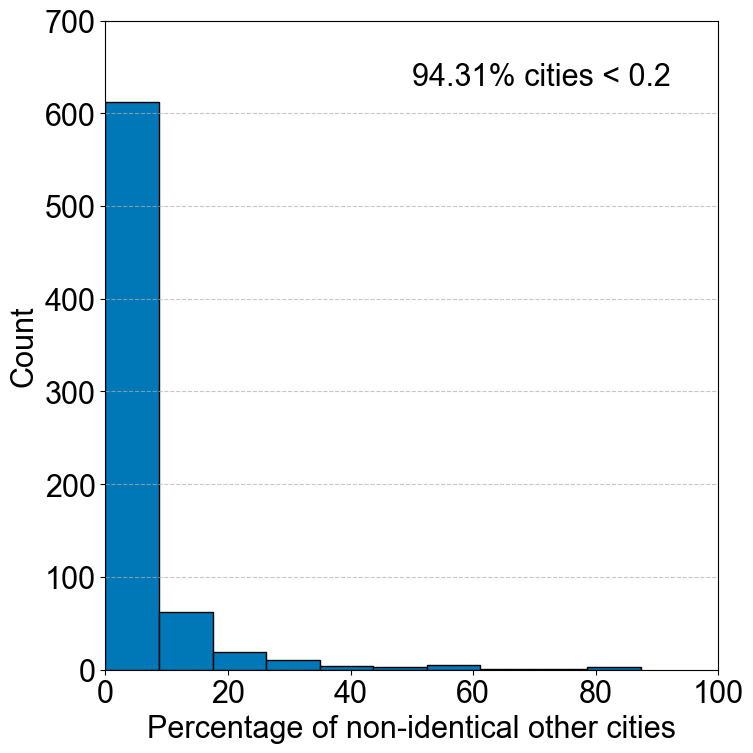

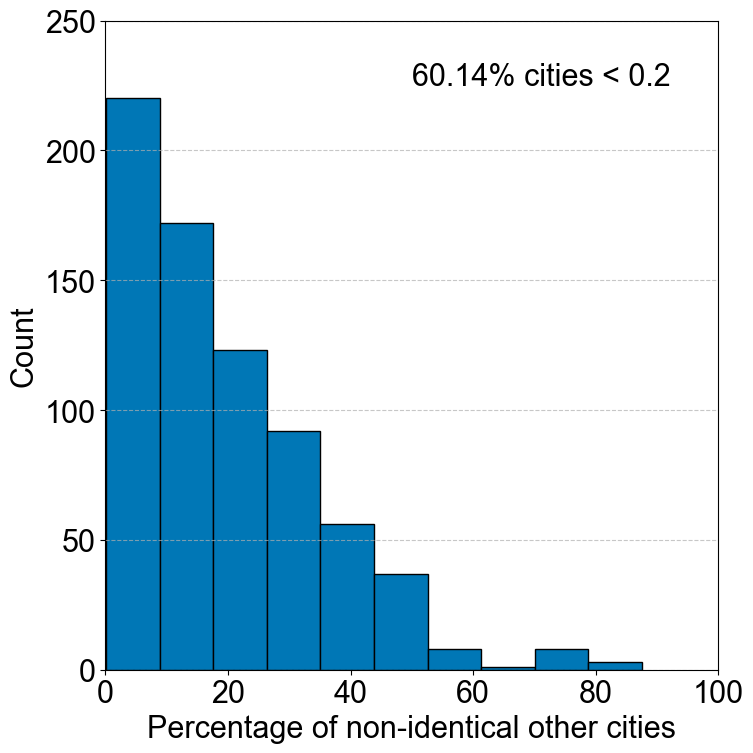

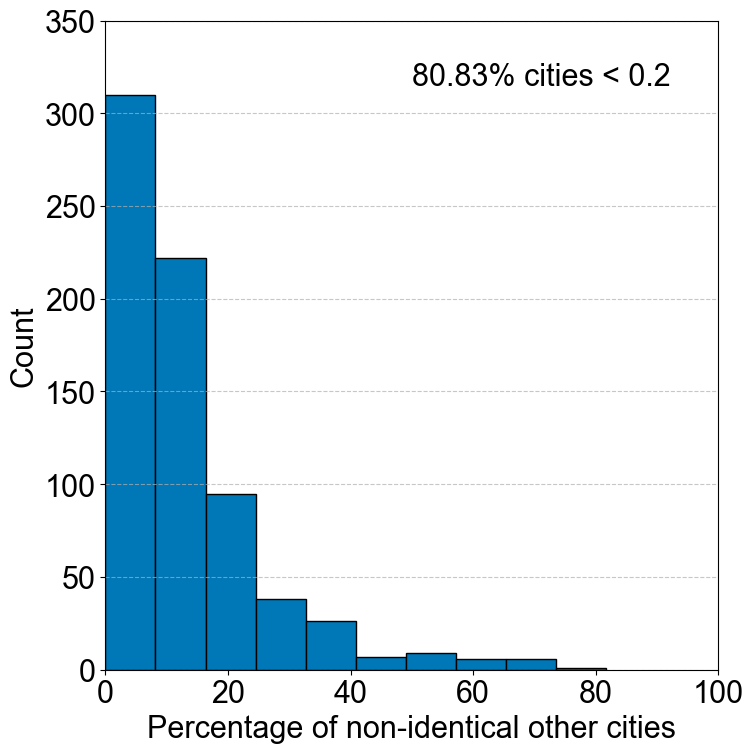

In [31]:
unique_row1 = results_df['Row1'].unique()
ratios = [
    results_df[(results_df['Row1'] == r) & (results_df['Covid_P-value'] < 0.05/(covid_fami.shape[0]-1))].shape[0] * 100 / len(unique_row1)
    for r in unique_row1
]
ratios_frac = [
    results_df[(results_df['Row1'] == r) & (results_df['Covid_P-value'] < 0.05/(covid_fami.shape[0]-1))].shape[0] / len(unique_row1)
    for r in unique_row1
]

# Calculate histogram manually
counts, bin_edges = np.histogram(ratios, bins=10)
probabilities = counts / counts.sum()  # Normalize to probabilities

# Plot the histogram
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.figure(figsize=(8,8))
plt.hist(ratios, bins=10, edgecolor='black', color='#0077b6', density=False)
# plt.bar(bin_centers, probabilities, width=np.diff(bin_edges), edgecolor='black', color='#0077b6')
plt.xlabel('Percentage of non-identical other cities')
plt.ylabel('Count')
# plt.title('Probability Distribution of Ratios of $p$-values < 0.05')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0,700)
plt.xlim(0,100)
plt.text(0.5, 0.9, r'{}% cities < 0.2'.format(np.round(sum(r<0.20 for r in ratios_frac)*100/len(ratios_frac), 2),), transform=plt.gca().transAxes)
plt.tight_layout()
plt.savefig('Prob_ratio_COVID.pdf', dpi=300)
plt.show()


unique_row1 = results_df['Row1'].unique()
ratios = [
    results_df[(results_df['Row1'] == r) & (results_df['Death_P-value'] < 0.05/(covid_fami.shape[0]-1))].shape[0] * 100 / len(unique_row1)
    for r in unique_row1
]
ratios_frac = [
    results_df[(results_df['Row1'] == r) & (results_df['Death_P-value'] < 0.05/(covid_fami.shape[0]-1))].shape[0] / len(unique_row1)
    for r in unique_row1
]

# Calculate histogram manually
counts, bin_edges = np.histogram(ratios, bins=10)
probabilities = counts / counts.sum()  # Normalize to probabilities

# Plot the histogram
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.figure(figsize=(8,8))
plt.hist(ratios, bins=10, edgecolor='black', color='#0077b6', density=False)
# plt.bar(bin_centers, probabilities, width=np.diff(bin_edges), edgecolor='black', color='#0077b6')
plt.xlabel('Percentage of non-identical other cities')
plt.ylabel('Count')
# plt.title('Probability Distribution of Ratios of $p$-values < 0.05')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0,250)
plt.xlim(0,100)
plt.text(0.5, 0.9, r'{}% cities < 0.2'.format(np.round(sum(r<0.20 for r in ratios_frac)*100/len(ratios_frac), 2),), transform=plt.gca().transAxes)
plt.tight_layout()
plt.savefig('Prob_ratio_DEATH.pdf', dpi=300)
plt.show()


unique_row1 = results_df['Row1'].unique()
ratios = [
    results_df[(results_df['Row1'] == r) & (results_df['Vaccine_P-value'] < 0.05/(covid_fami.shape[0]-1))].shape[0] * 100 / len(unique_row1)
    for r in unique_row1
]
ratios_frac = [
    results_df[(results_df['Row1'] == r) & (results_df['Vaccine_P-value'] < 0.05/(covid_fami.shape[0]-1))].shape[0] / len(unique_row1)
    for r in unique_row1
]

# Calculate histogram manually
counts, bin_edges = np.histogram(ratios, bins=10)
probabilities = counts / counts.sum()  # Normalize to probabilities

# Plot the histogram
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.figure(figsize=(8,8))
plt.hist(ratios, bins=10, edgecolor='black', color='#0077b6', density=False)
# plt.bar(bin_centers, probabilities, width=np.diff(bin_edges), edgecolor='black', color='#0077b6')
plt.xlabel('Percentage of non-identical other cities')
plt.ylabel('Count')
# plt.title('Probability Distribution of Ratios of $p$-values < 0.05')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0,350)
plt.xlim(0,100)
plt.text(0.5, 0.9, r'{}% cities < 0.2'.format(np.round(sum(r<0.20 for r in ratios_frac)*100/len(ratios_frac), 2),), transform=plt.gca().transAxes)
plt.tight_layout()
plt.savefig('Prob_ratio_VACCINE.pdf', dpi=300)
plt.show()

In [ ]:

from libpysal.weights import Queen
from esda.moran import Moran
from libpysal.weights import DistanceBand

import geopandas as gpd
import numpy as np
from builtins import all


cbsa_shape = gpd.read_file("./Data/tl_2019_us_cbsa/tl_2019_us_cbsa.shp")
cbsa_shape['cbsacode'] = [int(i) for i in cbsa_shape['GEOID']]

# Generate weights with a threshold of 10 units
def spatial_autocorrelation(array):
    # print(array.shape)
    MORAN = []
    MORAN_PVAL = []
    df = pd.DataFrame({
            'cbsacode': weeklynew_covid_data.cbsacode.unique(),
        })
    dt_famis = adf_detrend(array)
    for t in range(array.shape[1]):
        df['famis_{}'.format(str(t))] = dt_famis[:, t]

    cbsa_covid_famis = gpd.GeoDataFrame(cbsa_shape.merge(df, on='cbsacode'))
    for t in range(array.shape[1]):

        # Create a contiguity weights matrix
        w = DistanceBand.from_dataframe(cbsa_covid_famis, threshold=20)
        w.transform = 'r'  # Row standardization

        # Specify the variable of interest
        variable = cbsa_covid_famis["famis_{}".format(str(t))]

        # Calculate Moran's I
        moran = Moran(variable, w)
        # print(f"Moran's I: {moran.I}")
        MORAN.append(moran.I)
        # print(f"P-value: {moran.p_sim}")
        MORAN_PVAL.append(moran.p_sim)
    return MORAN, MORAN_PVAL

def find_independence(MORAN):
    return len([m for m in MORAN if m<-0.1 or m>0.1])

# Determine spatial independence
COVID_MORAN, COVID_MORAN_PVAL = spatial_autocorrelation(FAMIs_covid_weekly)
DEATH_MORAN, DEATH_MORAN_PVAL = spatial_autocorrelation(FAMIs_death_weekly)
VACCINE_MORAN, VACCINE_MORAN_PVAL = spatial_autocorrelation(FAMIs_fullvaccine_weekly)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There is 1 island with id: 223.
  warnings.warn(message)


('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an isla

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There is 1 island with id: 223.
  warnings.warn(message)


('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an isla

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There is 1 island with id: 223.
  warnings.warn(message)


('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an isla

In [82]:

print(f"Number of Moran's I for COVID-19 new infections (-0.1 < I < 0.1): {find_independence(COVID_MORAN)} out of {len(COVID_MORAN)}")
print(f"Number of Moran's I for COVID-19 new deaths (-0.1 < I < 0.1): {find_independence(DEATH_MORAN)} out of {len(DEATH_MORAN)}")
print(f"Number of Moran's I for COVID-19 new full vaccination series uptake (-0.1 < I < 0.1): {find_independence(VACCINE_MORAN)} out of {len(VACCINE_MORAN)}")

Number of Moran's I for COVID-19 new infections (-0.1 < I < 0.1): 5 out of 96
Number of Moran's I for COVID-19 new deaths (-0.1 < I < 0.1): 0 out of 96
Number of Moran's I for COVID-19 new full vaccination series uptake (-0.1 < I < 0.1): 0 out of 96
